### Optimización de Parámetros

Ya hemos visto varios ejemplos de algoritmos utilizados en Machine Learning, los cuales requieren ajustar distintos parámetros para generar la mejor predicción posible. Haremos una breve distinción técnica.

**Parámetros**

- Son internos a un algoritmo y se ajustan durante el entrenamiento para hacer una predicción.
- El ajuste de los parámetros se suele hacer de manera automática durante el proceso de entrenamiento.
- El usuario no suele fijar los parámetros.

Ejemplos:
- Los coeficientes en una regresión lineal
- Los cortes $\theta=(j,t_m)$ en árboles de decisiones
- Los pesos en una red neuronal
- Los vectores de soporte en una SVM

**Híper-parámetros**

- Son externos al algoritmo y se ajustan o fijan antes del al entrenamiento para optimizar la predicción.
- El usuario puede fijar los parámetros, dado no hay métodos analíticos o exactos que permitan hallar un valor óptimo de todos los posibles.
- Hay métodos heurísticos que permiten obtener buenas estimaciones, anque no nos garantizan tener un valor óptimo global. Por ejemplo: búsqueda de parámetros con validación cruzada.

Ejemplos:
- El grado del polinomio en una regresión polinomial
- Las funciones de impureza o la máxima profundidad de los árboles de decisión
- La taza de aprendizaje en una red neuronal
- La métrica utilizada en las SVMs o en algoritmos de clustering
- El número de clusters k en K-Means Clustering

**Nota.** También es común clasificar los modelos en paramétricos o no-paramétricos. Estos últimos se refieren a modelos que hacen menos suposiciones respecto a la distribución de los datos, ya sea que no tengan asociada una familia específica de distribuciones o que la complejidad se ajuste según los datos. Puedes leer [este artículo](https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/) para obtener más información.

# Clasificación

Los algoritmos de clasificación pertenecen a la rama de **aprendizaje supervisado**.

Su objetivo es construir una función $f$ que a los datos $X$ les asocie una **salida discreta** $Y$, i.e. los valores de salida son números enteros correspondientes a distintas **categorías**. (En regresión, la salida $Y$ es contínua).

Cuando hay únicamente 2 categorías se le conoce como **clasificación binaria**.

Los algoritmos de clasificación se pueden separar en 2 tipos: 

**Lazy Learners:**

- Almacenan los datos de entrenamiento y sólo generan predicciones cuando se les introduce una dato de prueba.
- Su efectividad depende de los datos. Si el espacio está adecuadamente poblado con datos, las predicciones se hacen por estimación local. Esto les permite generar predicciones con datos de distribucioens muy variadas. Sin embargo, tienden a tener dificultades si los datos son ruidosos o de gran volumen.
- Un ejemplo es K-Nearest Neighbors:

<img src="https://cdn-images-1.medium.com/max/800/0*Sk18h9op6uK9EpT8.">


**Eager Learners:**

- Son los que generan un modelo subyacente o función de predicción durante el entrenamiento.
- Las predicciones se construyen a partir del comportamiento global de los datos de entrenamiento, por lo que suelen ser más eficientes con las predicciones para grandes volúmenes de datos.
- Ejemplos de estos son los árboles de decisiones o las máquinas de soporte vectorial.

### La Matriz de Confusión

En clasificación binaria es una matriz de $2\times 2$ en donde se comparan las predicciones con los valores reales de los datos.

<img src="http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png">

Veremos como se implementa en Python. Comenzaremos importando los datos. En esta ocasión trabajaremos con datos de fraudes de tarjetas de crédito.

In [10]:
import pandas as pd
import numpy as np

path="Credit Card Fraud/creditcard.csv"
datos_df=pd.read_csv(path) #se usa espacio de indices
datos_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [11]:
datos_df.shape

(284807, 31)

In [12]:
#separaremos las etiquetas de los datos
features_df=datos_df.iloc[:,1:-1]
labels_df=datos_df.iloc[:,-1].to_frame() # convierte la serie de Pandas a DataFrame

In [13]:
X_data=features_df.values
y_labels=labels_df.values
y_labels=y_labels.reshape(y_labels.shape[0])

Haremos una predicción con un algoritmo que ya conocemos: Random Forest

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6)
predicted_tree = cross_val_predict(tree, X_data,y_labels, cv=5)

In [15]:
predicted_tree

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
set(predicted_tree)

{0, 1}

In [19]:
from sklearn.metrics import confusion_matrix

conf_mat_tree=confusion_matrix(y_labels,predicted_tree,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
conf_mat_tree

array([[   365,    101],
       [   127, 284214]])

Definiremos una función que calcula distintas métricas de evaluación:

In [17]:
def evaluate_conf_mat(matrix):
    true_pos=matrix[0,0]
    true_neg=matrix[1,1]
    false_positive=matrix[0,1]
    false_negative=matrix[1,0]
    
    total_pos=true_pos+false_negative
    total_neg=true_neg+false_positive
    
    sensitivity=true_pos/total_pos
    specificity=true_neg/total_neg
    pos_predictive_value=true_pos/(true_pos+false_positive)
    neg_predictive_value=true_neg/(true_neg+false_negative)
    
    false_neg_rate=1-sensitivity
    false_pos_rate=1-specificity
    
    false_discovery_rate=1-pos_predictive_value
    false_omission_rate=1-neg_predictive_value
    
    detection_rate=true_pos/(total_pos+total_neg)
    omission_rate=true_neg/(total_pos+total_neg)
    
    accuracy=(true_pos+true_neg)/(total_pos+total_neg) 
    prevalence=(true_pos+false_negative)/(total_pos+total_neg)
    
    f1=2*(sensitivity*pos_predictive_value)/(sensitivity+pos_predictive_value)
    
    informedness= sensitivity + specificity - 1
    markedness= pos_predictive_value + neg_predictive_value - 1
    
    a=(true_pos+false_positive)*(true_pos+false_negative)
    b=(true_neg+false_positive)*(true_neg+false_negative)
    mathews_cc=(true_pos*true_neg-false_positive*false_negative)/(np.sqrt(a)*np.sqrt(b))
    
    resumen1=[total_pos,total_neg,sensitivity,specificity,pos_predictive_value,neg_predictive_value]
    resumen2=[false_neg_rate,false_pos_rate,false_discovery_rate,false_omission_rate,detection_rate,omission_rate]
    resumen3=[accuracy,prevalence,f1,informedness,markedness,mathews_cc]
    resumen=resumen1+resumen2+resumen3
    
    indices1=["Total Positive","Total Negative","Sensitivity","Specificity","Positive Predictive Value","Neg Predictive Value"]
    indices2=["False Negative Rate","False Positive Rate","False Discovery Rate","False Omission Rate","Detection Rate","Omission Rate"]
    indices3=["Accuracy","Prevalence","f1","Informedness","Markedness","Mathews Correlation Coefficient"]
    indices=indices1+indices2+indices3
    
    stats=pd.DataFrame(resumen)
    stats.columns=['cantidad']
    stats.index=indices
    stats.index.name='indicador'
    return stats

In [20]:
res_tree=evaluate_conf_mat(conf_mat_tree)
res_tree #.sort_values(by="cantidad")

,cantidad
indicador,
Total Positive,492.000000
Total Negative,284315.000000
Sensitivity,0.741870
Specificity,0.999645
Positive Predictive Value,0.783262
Neg Predictive Value,0.999553
False Negative Rate,0.258130
False Positive Rate,0.000355
False Discovery Rate,0.216738


### Clasificación Multi-Clase

En general, cuando hay $n$ clases (clasificación multiclase) hay varios métodos con los que se puede extender un algoritmo de clasificación binaria:

**One vs Rest**

Consiste en entrenar $n$ clasificadores binarios, uno por cada clase, donde cada uno se entrena tomando los miembros de la clase como positivos y los de todas las otras clases como negativos. 

Para generar la predicción de un dato nuevo, se necesitan comparar las predicciones de los $n$ clasificadores y predecir aquella donde no está clasificada como negativo (clasificación perfecta) o utilizar medidas de confianza para estimar la predicción adecuada. 

**One vs One**

Consiste en tomar todas las combinaciones posibles de dos clases: ${}_nC_2 =\binom{n}{2}=\frac{n!}{2!(n-2)!}=\frac{n(n-1)}{2}.$

Para generar la predicción de un dato nuevo, se utilizan todos los clasificadores y se escoge la predicción que tenga más votos para una cierta etiqueta.

Por otro lado existen modificaciones adicionales a algoritmos de clasificación binaria que les permiten trabajar con múltiples clases. Por ejemplo: Árboles de Decisión, SVM y Redes Neuronales.

### Generalización de la Matriz de Confusión

En el caso de $n$ clases se obtiene una matriz de $n \times n$ de la misma manera.

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0376635717301146-gr1.jpg">

De esta se pueden obtener métricas generales. Por ejemplo:

$$\text{Accuracy}=\frac{\sum_i TP_i}{\text{Total Number of Entries}}=\frac{a+e+i}{a+b+c+d+e+f+g+h+i}$$

A sí mismo, se pueden obtener matrices de $2 \times 2$ para los esquemas one-vs-one (sub-matriz) y one-vs-rest, aplicando las métricas que ya conocemos para el caso binario.

En cuanto a la implementación en Python, estas son maneras sencillas de generarlas con librerías que ya conocemos.

In [12]:
#pandas
y_actu = pd.Series([2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2], name='Actual')
y_pred = pd.Series([0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred).T
df_confusion

Actual,0,1,2
Predicted,,,
0,3,0,2
1,0,1,1
2,0,2,3


In [13]:
#sci-kit learn
confusion_matrix(y_actu,y_pred).T

array([[3, 0, 2],
       [0, 1, 1],
       [0, 2, 3]])

# Máquinas de Soporte Vectorial (SVM)

Las Máquinas de Soporte Vectorial son uno de los algoritmos más populares para problemas de clasificación. Tienen la ventaja de tener una construcción analítica clara y, por lo mismo, su funcionamiento es fácilmente interpretable. Consideremos los siguientes datos de clasificación binaria:

<img src="images/Lin-sep data white.png" width=300>

Deseamos separar los puntos ambas clases utilizando una línea recta. Hay varias opciones que podemos utilizar:

<img src="images/Lin-sep lines white.png">

¿Cuál es la mejor opción? Notemos que todas nos dan un error de entrenamiento de cero.

Usaremos la que tenga el mayor margen para que pueda generalizarse mejor la predicción.

<img src="images/Lin-sep margins white.png">

**Obs.**
- Estamos suponiendo que ambas clases se pueden separar perfectamente por una línea, i.e. son **linealmente separables**. Más adelante veremos cómo se manejan los casos donde los datos no son linealmente separables.
- Asumiremos el caso de clasificación binaria (sólo 2 clases).

### Planteamiento Analítico del Problema

¡Pongámoslo en términos matemáticos! La ecuación de la recta (en general un plano) será: 

$$\boxed{\color{blue}{\mathbf{w}^\intercal} \mathbf{x} + \color{blue}{b} = 0}, \quad \text{(1)}$$ 

donde deberemos hallar $\color{blue}{\mathbf{w}}\in \mathbb{R}^d$ y $\color{blue}{b} \in \mathbb{R}$ a partir de los datos de entrenamiento $\mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_N$.

**Obs.**
- Si multiplicamos (1) por un escalar no-cero, el plano seguirá siendo el mismo. Esto significa que, para obtener valores únicos de $\color{blue}{\mathbf{w}}$ y $\color{blue}{b}$ debemos poner una restricción. En particular, pediremos que los puntos del conjunto de entrenamiento más cercanos al plano (en el borde el margen) sean tales que:

$$\boxed{|\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_n + \color{blue}{b}| = 1}, \quad \text{(2)}$$
- A estos puntos se le llama **vectores de soporte**. S.P.G. asumiremos que $\mathbf{x}_n$ es un vector de soporte.
- $\mathbf{x}$ es un punto del plano, pero $\mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_N$ estan fuera del plano.

Deseamos **maximizar el margen**, i.e. la distancia entre el plano y los vectores de soporte. Entonces, la distancia entre un vector de soporte y el plano es:

$$\mathcal{D}=|\color{blue}{\mathbf{\hat{w}}^\intercal}(\mathbf{x}_n-\mathbf{x})|.\quad \text{(3)}$$

<img src="images/plane-point dist white.png" width=500>

Desarrolando (3), vemos que:

$$\mathcal{D}=|\color{blue}{\mathbf{\hat{w}}^\intercal}\mathbf{x}_n-\color{blue}{\mathbf{\hat{w}}^\intercal}\mathbf{x}|=\frac{1}{||\color{blue}{\mathbf{w}}||}|\color{blue}{\mathbf{w}^\intercal}\mathbf{x}_n-\color{blue}{\mathbf{w}^\intercal}\mathbf{x}|=\frac{1}{||\color{blue}{\mathbf{w}}||}|\color{blue}{\mathbf{w}^\intercal}\mathbf{x}_n +\color{blue}{b}-\color{blue}{\mathbf{w}^\intercal}\mathbf{x}-\color{blue}{b}|=\frac{1}{||\color{blue}{\mathbf{w}}||}, \quad \text{(4)}$$

donde usamos (1) y (2) en la ultima igualdad.

Por lo tanto, tenemos el siguiente problema de optimización:

$$\max \mathcal{D}=\frac{1}{||\color{blue}{\mathbf{w}}||}\quad \text{sujeto a} \quad \min_{i=1,2,...,N}|\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_i + \color{blue}{b}| = 1. \quad \text{(5)}$$

**Obs:** Si $y_i$ es la etiqueta correspondiente a $\mathbf{x}_i$ y estas son tales que $y_i=-1,1$, entonces:

$$|\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_i + \color{blue}{b}|=y_i(\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_i + \color{blue}{b}). \quad (6)$$

Utilizando (6) podemos convertir el problema de optimización a uno más sencillo:

$$\boxed{\min \frac{1}{2} \color{blue}{\mathbf{w}^\intercal} \color{blue}{\mathbf{w}}\quad \text{sujeto a} \quad y_i(\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_i + \color{blue}{b}) \geq 1 \quad \text{para}\quad i=1,2,...,N}. \quad \text{(7)}$$

**Obs:** (6) y (7) son equivalentes, ya que podemos escoger $\color{blue}{\mathbf{w}}$ y $\color{blue}{b}$ de modo que $y_i(\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_i + \color{blue}{b}) = 1$ para almenos uno de $\mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_N$.

### Solución del Problema de Optimización

Los problemas de optimización en donde las constricciones son igualdades se resuelven mediante el método de **multiplicadores de Lagrange**. Sin embargo, para cuando hay constricciones que son desigualdades se requiere usar un método más general: el método de KTT (Karush-Kuhn-Tucker). Para esto, únicamente tenemos que asumir que la constricción es una igualdad, pero requiriendo a los multiplicadores de Lagrange ser no-negativos.

En este caso, el Lagrangiano queda como:

$$\boxed{\mathcal{L}(\color{blue}{\mathbf{w}},\color{blue}{b},\color{green}{\mathbf{\alpha}})=\frac{1}{2} \color{blue}{\mathbf{w}^\intercal} \color{blue}{\mathbf{w}}-\sum_{i=1}^N \color{green}{\alpha_i} (y_i(\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_i + \color{blue}{b}) -1)}, \quad \text{(8)} $$

el cual debemos **minimizar** con respecto a $\color{blue}{\mathbf{w}}$ y $\color{blue}{b}$ y **maximizar** con respecto a $\color{green}{\alpha_i} \geq 0$ para $i=1,...,N$.

Derivando con respecto a $\color{blue}{\mathbf{w}}$ y $\color{blue}{b}$ obtenemos:

$$
\nabla_\color{blue}{\mathbf{w}}\mathcal{L}=\color{blue}{\mathbf{w}}-\sum_{i=1}^N \color{green}{\alpha_i} y_i \mathbf{x}_i= \mathbf{0} \quad (9)\\
\frac{\partial \mathcal{L}}{\partial \color{blue}{b}}= -\sum_{i=1}^N \color{green}{\alpha_i} y_i = 0. \quad (10)
$$

De (9) y (10) obtenemos:
$$
\boxed{\color{blue}{\mathbf{w}} =\sum_{i=1}^N \color{green}{\alpha_i} y_i \mathbf{x}_i} \quad (11)\\
\text{y}\\
\boxed{\sum_{i=1}^N \color{green}{\alpha_i} y_i = 0}. \quad (12)
$$

Sustituyendo (11) y (12) en (8):

$$\boxed{\mathcal{L}(\color{green}{\mathbf{\alpha}})=\sum_{i=1}^N \color{green}{\alpha_i} - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \color{green}{\alpha_i \alpha_j} y_i y_j \mathbf{x}_i^\intercal \mathbf{x}_j}, \quad (13) $$

el cual debemos **maximizar** con respecto a $\color{green}{\alpha_i} \geq 0$ para $i=1,...,N$, tomando en cuenta (12).

La ecuación (13) representa, de manera equivalente, el siguiente problema de optimización:

$$\min_{\color{green}{\mathbf{\alpha}}}\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \color{green}{\alpha_i \alpha_j} y_i y_j \mathbf{x}_i^\intercal \mathbf{x}_j - \sum_{i=1}^N \color{green}{\alpha_i}, \quad (14)$$

el cual se suele escribir como:

$$\boxed{\min_{\color{green}{\mathbf{\alpha}}}\frac{1}{2} \color{green}{\mathbf{\alpha}^\intercal} \mathbf{Q} \color{green}{\mathbf{\alpha}}  - \mathbf{e} \color{green}{\mathbf{\alpha}}}, \quad (15)$$

sujeto a $\color{green}{\alpha_i} \geq 0$ para $i=1,...,N$, y tomando en cuenta $\mathbf{y}^\intercal \color{green}{\mathbf{\alpha}} = 0$. En (15), $\mathbf{Q}$ es una matriz de $N \times N$, donde $Q_{ij}=y_i y_j \mathbf{x}_i^\intercal \mathbf{x}_j$ y $\mathbf{e}$ es un vector que tiene 1 en todas sus entradas. A (15) se le suele llamar el **problema dual** a (7).

Existen paquetes de software que pueden resolver (15) fácilmente. Los algoritmos que implementan son conocidos como **Quadratic Programming** en inglés.

### Regresando a la Ecuación del Plano

Una vez que ya tenemos $\color{green}{\mathbf{\alpha}}$ que resuelve (15), podemos hallar diréctamente $\color{blue}{\mathbf{w}}$ mediante (11): $\color{blue}{\mathbf{w}} =\sum_{i=1}^N \color{green}{\alpha_i} y_i \mathbf{x}_i$.

Recordemos que la constricción de igualdad que planteamos en (8) es: $\color{green}{\alpha_i}(y_i(\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_i + \color{blue}{b})- 1)=0$ para $i=1,2,...,N$. 

Esto significa que, si $\color{green}{\alpha_i} > 0$, entonces $\mathbf{x}_i$ es un vector de soporte. Si $\color{green}{\alpha_i} = 0$. Por lo tanto, podemos hallar $\color{blue}b$ utilizando cualquier vector de soporte en $y_i(\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_i + \color{blue}{b})=1$.

Finalmente, la función de decisión que se utiliza para clasificar un punto cualquiera $\mathbf{x}$ será:

$$\boxed{g(x)=\text{sign}(\color{blue}{\mathbf{w}^\intercal} \mathbf{x} + \color{blue}{b})}. \quad (16)$$

# Datos No Linealmente Separables

¿Qué pasa si no podemos separar perfectamente los datos con una línea recta? Consideraremos 2 casos:

<img src="images/non-separability types white.png">

La idea general es para dato:

-**ligeramente no-separables**: Añadiremos un término de penalización en el problema de optimización que nos permita considerar errores de clasificación. A este tipo de SVMs se les llama **Soft-SVMs**, mientras que a las que no tienen penalización se les conoce como **Hard-SVMs**.

-**severamente no-separables**: Transformar los datos $\mathbf{x}_1,...,\mathbf{x}_N$ a otro espacio $\mathbf{z}_1,...,\mathbf{z}_N$ donde sí sean linealmente separables.

En la prática se utiliza una combinación de ambas soluciones para resolver problemas de clasificación.

## Datos Severamente No-Separables: El truco del Kernel

Supongamos que el problema es linealmente separable en un espacio $\mathcal{Z}$, donde la solución al problema está dada por:

$$\mathbf{w} =\sum_{i=1}^N \color{green}{\alpha_i} y_i \color{purple}{\mathbf{z}_i} \quad (17)$$

$$y_i(\mathbf{w}^\intercal \color{purple}{\mathbf{z}_i} + b)=1 \quad (18)$$

$$g(x)=\text{sign}(\mathbf{w}^\intercal \color{purple}{\mathbf{z}} + b). \quad (19)$$

Notamos que para hacer todos los cálculos y obtener la solución únicamente necesitamos conocer el producto interno $\color{purple}{\mathbf{z}_i^\intercal}\color{purple}{\mathbf{z}_j}=\mathcal{K}(\mathbf{x}_i,\mathbf{x}_j)$, i.e. no necesitamos la transformación de manera explícita! Únicamente necesitamos la función $\mathcal{K}(\mathbf{x}_i,\mathbf{x}_j)$, a la cual se le conoce como el **kernel**.

En realidad, el problema de optimización a resolver será muy similar. Únicamente tenemos que sustituir $\mathbf{x}_i$ por $\color{purple}{\mathbf{z}_i}$ y luego, dado que $\color{purple}{\mathbf{z}_i}$ sólo aparece como productos internos, expresar todo en términos de $\mathcal{K}(\mathbf{x}_i,\mathbf{x}_j)$.

Entonces:

$$\boxed{g(x)=\text{sign}\bigg(\sum_{i=1}^N \color{green}{\alpha_i} y_i \mathcal{K}(\mathbf{x}_i,\mathbf{x}) + b \bigg)}, \quad (19)$$

donde

$$b=y_j - \sum_{i=1}^N \color{green}{\alpha_i} y_i \mathcal{K}(\mathbf{x}_i,\mathbf{x}_j) \quad (18)$$

para cualquier $\color{green}{\alpha_m} >0$. Notemos que no necesitamos $\mathbf{w}$ para la solución.

### Ejemplos de Kernels

-**Kernel Lineal:** $\mathcal{K}(\mathbf{x},\mathbf{x'})=\mathbf{x}_1 \mathbf{x'}_1 + \mathbf{x}_2 \mathbf{x'}_2$.

Este es el producto interno usual $\mathbf{x}^\intercal \mathbf{x'}$

-**Kernel Polinomial:** $\mathcal{K}(\mathbf{x},\mathbf{x'})=(1+\mathbf{x}^\intercal \mathbf{x})^2$.

Desarrollando:

$\mathcal{K}(\mathbf{x},\mathbf{x'})=(1+\mathbf{x}_1 \mathbf{x'}_1 + \mathbf{x}_2 \mathbf{x'}_2)^2=1+\mathbf{x}_1^2\mathbf{x'}_1^2+\mathbf{x}_2^2 \mathbf{x'}_2^2 + 2 \mathbf{x}_1 \mathbf{x'}_1 + 2 \mathbf{x}_2 \mathbf{x'}_2 + 2 \mathbf{x}_1 \mathbf{x'}_1 \mathbf{x}_2 \mathbf{x'}_2$.

Esto se puede escribir como el producto interior de:

$\mathcal{x}=(1,x_1^2,x_2^2,\sqrt{2}x_1,\sqrt{2}x_2,\sqrt{2}x_1 x_2)$ y

$\mathcal{x'}=(1,{x'}_1^2,{x'}_2^2,\sqrt{2}{x'}_1,\sqrt{2}{x'}_2,\sqrt{2}{x'}_1 {x'}_2)$

En general, $\mathcal{K}(\mathbf{x},\mathbf{x'})=(\gamma+r \mathbf{x}^\intercal \mathbf{x})^a$.

-**Kernel RBF**:  $\mathcal{K}(x,x')=e^{-||x-x'||^2}$.

Esto se puede escribir como: 

$\mathcal{K}(x,x')=e^{-x^2}e^{-{x'}^2}e^{2xx'}=e^{-x^2}e^{-{x'}^2}\sum_{k=0}^\infty \frac{2^k x^k {x'}^k}{k!}=e^{-x^2}e^{-{x'}^2}\sum_{k=0}^\infty \frac{2^{\frac{k}{2}} x^k }{k!^\frac{1}{2}} \frac{2^{\frac{k}{2}} {x'}^k}{k!^\frac{1}{2}}$.

Esto puede interpretarse como el producto interior de dos vectores de dimensión infinita!!

En general: $\mathcal{K}(\mathbf{x},\mathbf{x'})=e^{-\gamma||\mathbf{x}-\mathbf{x'}||^2}$.

## Datos Ligeramente No-Separables: Penalización de Errores

En esta caso únicamente debemos incluir términos adicionales en el Lagrangiano que planteamos en (8). Vamos a introducir una penalización $\color{red}{\xi_i} \geq 0$ correspondiente a qué tanto un punto $\mathbf{x}_i$ viola el margen, i.e. $y_i(\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_i + \color{blue}{b}) \geq 1-\color{red}{\xi_i}$.  

<img src="images/violation svm white.png" width=300>

Por lo tanto, el Lagrangiano queda como:

$$\boxed{\mathcal{L}(\color{blue}{\mathbf{w}},\color{blue}{b},\color{red}{\mathbf{\xi}},\color{green}{\mathbf{\alpha}},\color{green}{\mathbf{\beta}})=\frac{1}{2} \color{blue}{\mathbf{w}^\intercal} \color{blue}{\mathbf{w}}+\mathcal{C}\sum_{i=1}^N \color{red}{\xi_i} -\sum_{i=1}^N \color{green}{\alpha_i} (y_i(\color{blue}{\mathbf{w}^\intercal} \mathbf{x}_i + \color{blue}{b}) -1 + \color{red}{\mathbf{\xi}_i}) -\sum_{i=1}^N \color{green}{\mathbf{\beta}_i} \color{red}{\mathbf{\xi}_i} }, \quad \text{(19)} $$

donde $\color{blue}{\mathbf{w}}\in \mathbb{R}^d$, $\color{blue}{b} \in \mathbb{R}$, $\color{red}{\mathbf{\xi}} \in \mathbb{R}^N$ y $\color{green}{\alpha_i} \geq 0$, $\color{green}{\beta_i} \geq 0$ para $i=1,...,N$ son los multiplicadores de Lagrange.

Derivando (19), obtenemos ecuaciones similares a (9) y (10):

$$
\nabla_\color{blue}{\mathbf{w}}\mathcal{L}=\color{blue}{\mathbf{w}}-\sum_{i=1}^N \color{green}{\alpha_i} y_i \mathbf{x}_i= \mathbf{0} \quad (20)\\
\frac{\partial \mathcal{L}}{\partial \color{blue}{b}}= -\sum_{i=1}^N \color{green}{\alpha_i} y_i = 0, \quad (21)\\
\frac{\partial \mathcal{L}}{\partial \color{red}{\xi_i}}=C - \color{green}{\alpha_i}-\color{green}{\beta_i}=0. \quad (22)
$$

De (22) obtenemos que $\color{green}{\alpha_i} \leq C$. Esto significa que en esta ocasión, los vectores de soporte serán aquellos que: $0 < \color{green}{\alpha_i} \leq C$.

## Implementación SVM

Continuando con los datos de fraudes de tarjetas de crédito, utilizaremos la función `SVC` de Sci-Kit Learn. Esta  tiene las siguientes características:

- Se puede utilizar para clasificasión multi-clase. Utiliza el esquema one-vs-one.
- Implementa los kernels RBF, polinomial, lineal y sigmoide. A sí mismo, se le pueden introducir Kernels definidos por el usuario.
- Los parámetros `gamma` y `coef0` corresponden a los coeficientes utilizados en los kernels.

- Implementa una penalización de error mediante el parámetro `C`.

In [15]:
from sklearn.svm import SVC
SVC(C=1.0, kernel="rbf", degree=3, gamma="auto", coef0=0.0, shrinking=True, probability=False, tol=0.001, 
    cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape="ovo", random_state=None)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Advertencia.** Es recomendable no utilizar una SVM de esta librería con más de 100,000 datos. Utilizando la base completa de datos con validación cruzada de 5 cortes en una máquina de 8 Gb de RAM **el algoritmo tardó más de 12 horas en terminar**.

Por esta razón utilizaremos únicamente una muestra pequeña de la base de datos.

In [21]:
sample_df=datos_df.iloc[:10000,:]

In [23]:
sample_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
datos_df.shape,sample_df.shape

((284807, 31), (10000, 31))

In [28]:
#separaremos las etiquetas de los datos
features_df=sample_df.iloc[:,1:-1]
labels_df=sample_df.iloc[:,-1].to_frame() # convierte la serie de Pandas a DataFrame

In [29]:
X_data=features_df.values
y_labels=labels_df.values
y_labels=y_labels.reshape(y_labels.shape[0])

In [32]:
svc=SVC(C=1,verbose=True,kernel='rbf',gamma="auto", coef0=0.0,class_weight='balanced',cache_size=400)
svc.fit(X_data,y_labels)
predicted_svm=svc.predict(X_data)

[LibSVM]

In [33]:
conf_mat_svm=confusion_matrix(y_labels,predicted_svm,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
conf_mat_svm

array([[  38,    0],
       [   0, 9962]])

In [34]:
svc=SVC(C=1,verbose=True,kernel='rbf',gamma="auto", coef0=0.0,class_weight='balanced',cache_size=400)
predicted_svm=cross_val_predict(svc, X_data,y_labels, cv=5)
conf_mat_svm=confusion_matrix(y_labels,predicted_svm,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
conf_mat_svm

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([[  25,    0],
       [  13, 9962]])

In [36]:
res_svm=evaluate_conf_mat(conf_mat_svm)

resumen=pd.concat([res_tree,res_svm], axis=1, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,copy=True)
resumen.columns=["DTree","SVM"]
resumen

,DTree,SVM
indicador,,
Total Positive,492.000000,38.000000
Total Negative,284315.000000,9962.000000
Sensitivity,0.754065,0.657895
Specificity,0.999652,1.000000
Positive Predictive Value,0.789362,1.000000
Neg Predictive Value,0.999574,0.998697
False Negative Rate,0.245935,0.342105
False Positive Rate,0.000348,0.000000
False Discovery Rate,0.210638,0.000000


# SVMs para Regresión

SVR complexity and bandwidth selected and model fitted in 0.423 s
KRR complexity and bandwidth selected and model fitted in 0.146 s
Support vector ratio: 0.320
SVR prediction for 100000 inputs in 0.075 s
KRR prediction for 100000 inputs in 0.096 s


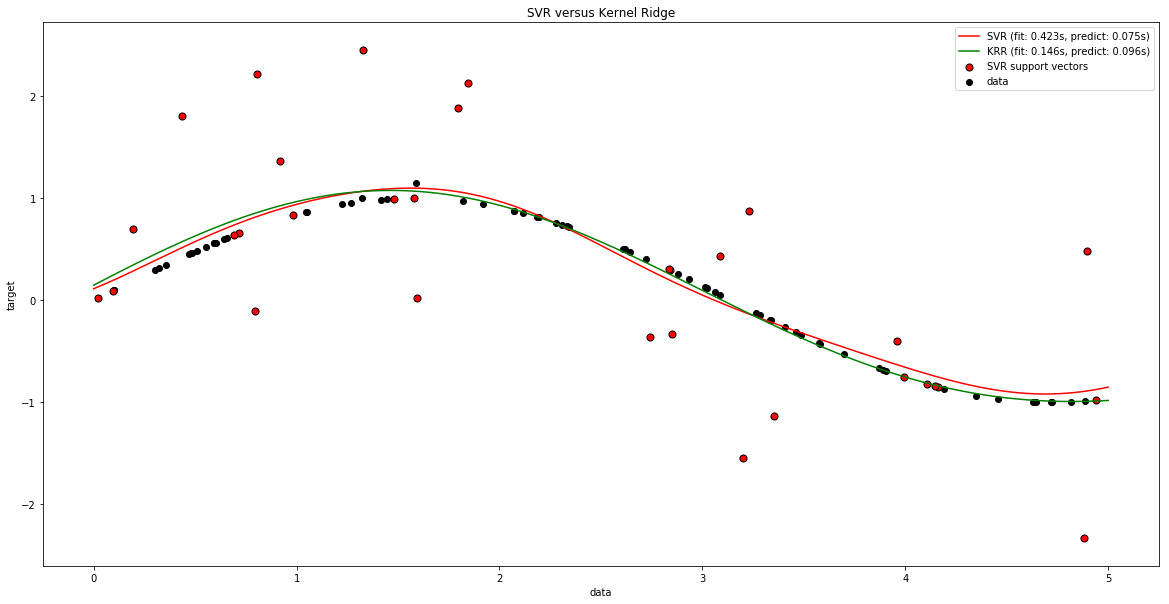

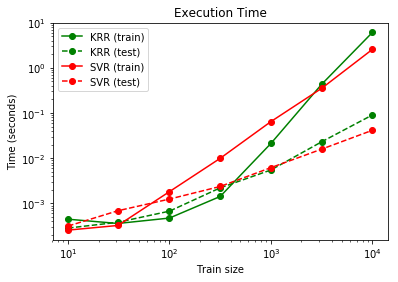

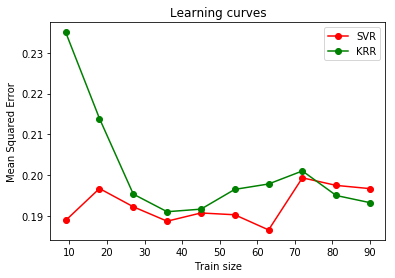

In [9]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD 3 clause

import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
%matplotlib inline

rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 100000)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],"gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s" % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"% kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))


# #############################################################################
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.figure(figsize=(20,10))
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr, c='g',label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7).astype(np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

# One-Class SVMs (el caso no-supervisado)

Una SVM de una clase es un algoritmo cuyo propósito es identificar datos que no tienen un comportamiento usual. En inglés, esta tarea se le denomina *Novelty Detection*. 

Consite en:

- Trazar el contorno (línea de separación) de los datos de entrenamiento. Estos tienen una distribución específica.
- Las observaciones las clasifica como usuales o inusuales según caigan dentro o fuera de ese contorno.

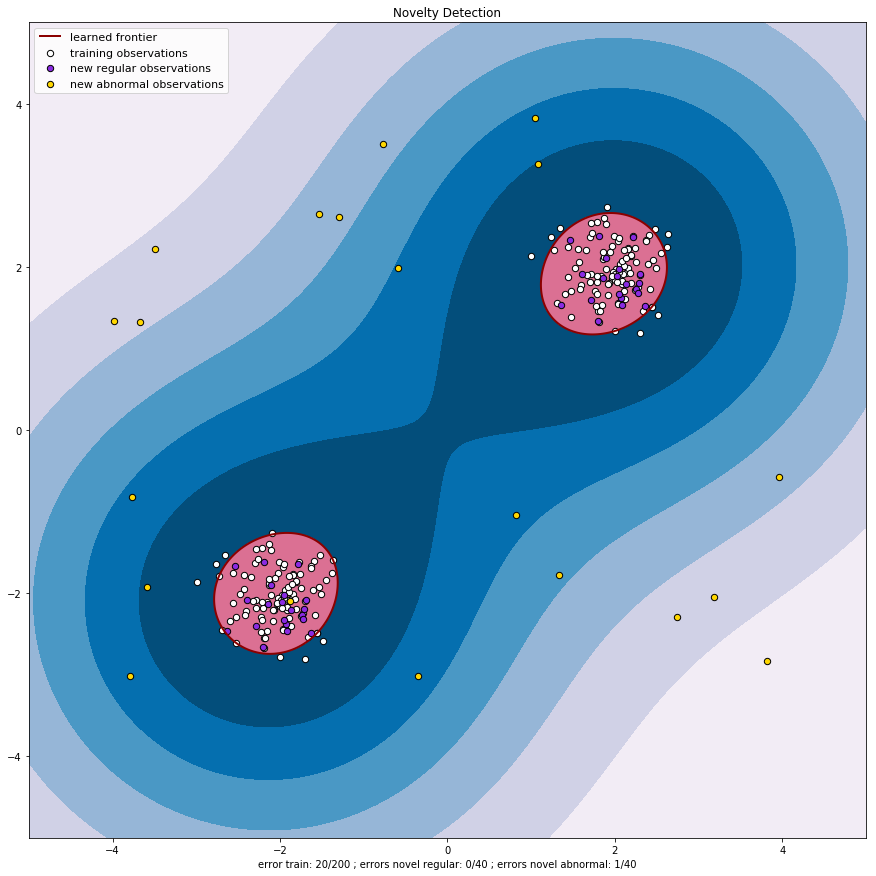

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15,15))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

# Referencias

- [DataCamp: Hyperparameter Optimization in Machine Learning Models](https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models)
- [Wikipedia: Hyperparameter Optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization)
- [Towards DataScience: Machine Learning Classifiers](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623)
- [Towards DataScience: A Quick Introduction to K-Nearest Neighbors Algorithm](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7)
- [Survey on Multiclass Classification Methods](https://www.cs.utah.edu/~piyush/teaching/aly05multiclass.pdf)
- [Yaser Abu-Mostafa (Caltech): Support Vector Machines](https://www.youtube.com/watch?v=eHsErlPJWUU&list=PLD63A284B7615313A&index=14)